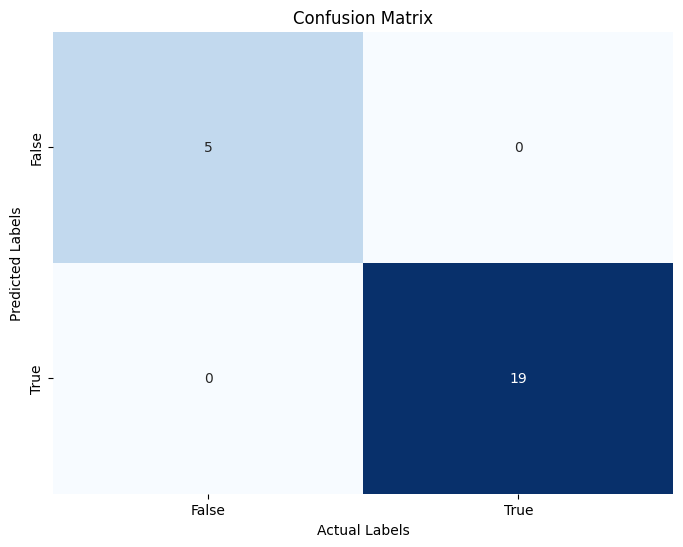

Accuracy: 1.00


In [8]:
# naive_bayes_evaluation.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import naiver_Bayes class
from naiver_bayes_klassifizierer import NaiveBayes

#  Data Preprocessing
def pre_processing(df):
    df["disease"] = df.apply(lambda row: False if row["inflammation"] == "no" and row["nephritis"] == "no" else True, axis=1)
    df = df.drop(["inflammation", "nephritis"], axis=1)
    df = df.sample(frac=1, random_state=25).reset_index(drop=True)
    
    split_index = int(len(df) * 0.8)
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]
    
    test_labels = test_df["disease"]
    test_df = test_df.drop(columns=["disease"])
   
    return train_df, test_df, test_labels



# Train the Naive Bayes Classifier
nb_classifier = NaiveBayes()
nb_classifier.fit(train_df, "disease") # type: ignore

# Evaluate the classifier
accuracy, confusion_matrix = nb_classifier.evaluate_on_data(test_df, test_labels) # type: ignore

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")
